# Exploratory Data Analysis (EDA)

Since we generate synthetic data for our model we use a different table of contents compared to the template.

## Table of Contents
1. [Notebook Preparation](#notebook-preparation)
2. [Data Generation](#data-generation)
3. [Data Visualisation](#data-visualisation)
4. [Data Size-Reduction](#data-size-reduction)
5. [Data Statistics](#data-statistics)


## Notebook Preparation

If run remotely (e.g. on Google colab) we need to install some packages and also download our libraries

In [ ]:
# Use this to install potential missing packages
# %pip install seaborn

In [ ]:
# Use this to download the matrix library from GitHub
# TODO: provide packaged matrixlib via GitHub

# Currently you'll have to manually upload the 'matrixlib' and 'modellib' to colab if tou want to run the notebook there.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import importlib

import matrixlib as mxl

## Data Generation

We generate three slightly different sets of matrices to show how these differences manifest in the visualised matrices.

In [2]:
# We first set sine global values used in the matrix generation
MATRIX_DIM = 64
NUMBER_OF_MATRICES = 100
DIAGONAL_BAND_RADIUS = 10
DETERMINANT_CUTOFF = 1e-05
RNG_SEED = 42

In [3]:
# We generate three sets to compare their generated matrices later

# Set 1 has the values presented in Götz & Anzt (2018).
set1_bgr_noise_vp = mxl.core.ValueProperties(density_range=(0.3, 0.5), value_range=(0.0, 0.5))
set1_blk_noise_vp = mxl.core.ValueProperties(density_range=(0.3, 0.5), value_range=(0.0, 0.5))
set1_blk_noise_bp = mxl.core.BlockProperties(size_range=(3, 32), size_average=10, size_std_dev=0.66, gap_chance=0.5)
set1_blk_tdata_vp = mxl.core.ValueProperties(density_range=(0.5, 0.7), value_range=(0.0, 1.0))
set1_blk_tdata_bp = mxl.core.BlockProperties(size_range=(2, 32), size_average=10, size_std_dev=0.66, gap_chance=0.0)

# Set 2 has a noise value range closer to the value range of the true data as well as different block size averages 
set2_bgr_noise_vp = mxl.core.ValueProperties(density_range=(0.3, 0.5), value_range=(0.0, 0.9))
set2_blk_noise_vp = mxl.core.ValueProperties(density_range=(0.3, 0.5), value_range=(0.0, 0.9))
set2_blk_noise_bp = mxl.core.BlockProperties(size_range=(3, 32), size_average=14, size_std_dev=0.66, gap_chance=0.5)
set2_blk_tdata_vp = mxl.core.ValueProperties(density_range=(0.5, 0.7), value_range=(0.0, 1.0))
set2_blk_tdata_bp = mxl.core.BlockProperties(size_range=(2, 32), size_average=8, size_std_dev=0.66, gap_chance=0.0)

# Set 3 has much lower background noise density but denser noise blocks with lower values
set3_bgr_noise_vp = mxl.core.ValueProperties(density_range=(0.1, 0.3), value_range=(0.0, 0.5))
set3_blk_noise_vp = mxl.core.ValueProperties(density_range=(0.4, 0.6), value_range=(0.0, 0.3))
set3_blk_noise_bp = mxl.core.BlockProperties(size_range=(3, 32), size_average=10, size_std_dev=0.66, gap_chance=0.5)
set3_blk_tdata_vp = mxl.core.ValueProperties(density_range=(0.5, 0.7), value_range=(0.0, 1.0))
set3_blk_tdata_bp = mxl.core.BlockProperties(size_range=(2, 32), size_average=10, size_std_dev=0.66, gap_chance=0.0)

In [4]:
# TODO: remove this when notebook is working
# reload the library when changes were made to it
importlib.reload(mxl)
importlib.reload(mxl.core)
importlib.reload(mxl.util)
importlib.reload(mxl.io)

<module 'matrixlib.io' from 'C:\\Projects\\Dev\\opencampus-preconditioner-ai-project\\matrixlib\\io.py'>

In [8]:
# Fix the seed value for reproducibility
np.random.seed(RNG_SEED)

# The three sets of matrices are generated
matrix_data_set1 = mxl.core.MatrixData(
    dimension=MATRIX_DIM, band_radius=DIAGONAL_BAND_RADIUS, sample_size=NUMBER_OF_MATRICES,
    background_noise_value_properties=set1_bgr_noise_vp,
    block_noise_value_properties=set1_blk_noise_vp, block_noise_block_properties=set1_blk_noise_bp,
    block_data_value_properties=set1_blk_tdata_vp, block_data_block_properties=set1_blk_tdata_bp,
    seed=RNG_SEED, determinant_cutoff=DETERMINANT_CUTOFF, print_debug=False,
)

matrix_data_set2 = mxl.core.MatrixData(
    dimension=MATRIX_DIM, band_radius=DIAGONAL_BAND_RADIUS, sample_size=NUMBER_OF_MATRICES,
    background_noise_value_properties=set2_bgr_noise_vp,
    block_noise_value_properties=set2_blk_noise_vp, block_noise_block_properties=set2_blk_noise_bp,
    block_data_value_properties=set2_blk_tdata_vp, block_data_block_properties=set2_blk_tdata_bp,
    seed=RNG_SEED, determinant_cutoff=DETERMINANT_CUTOFF, print_debug=False,
)

matrix_data_set3 = mxl.core.MatrixData(
    dimension=MATRIX_DIM, band_radius=DIAGONAL_BAND_RADIUS, sample_size=NUMBER_OF_MATRICES,
    background_noise_value_properties=set3_bgr_noise_vp,
    block_noise_value_properties=set3_blk_noise_vp, block_noise_block_properties=set3_blk_noise_bp,
    block_data_value_properties=set3_blk_tdata_vp, block_data_block_properties=set3_blk_tdata_bp,
    seed=RNG_SEED, determinant_cutoff=DETERMINANT_CUTOFF, print_debug=False,
)

## Data Visualisation

[Present the matrices and their sub-components (blocks/noise).]


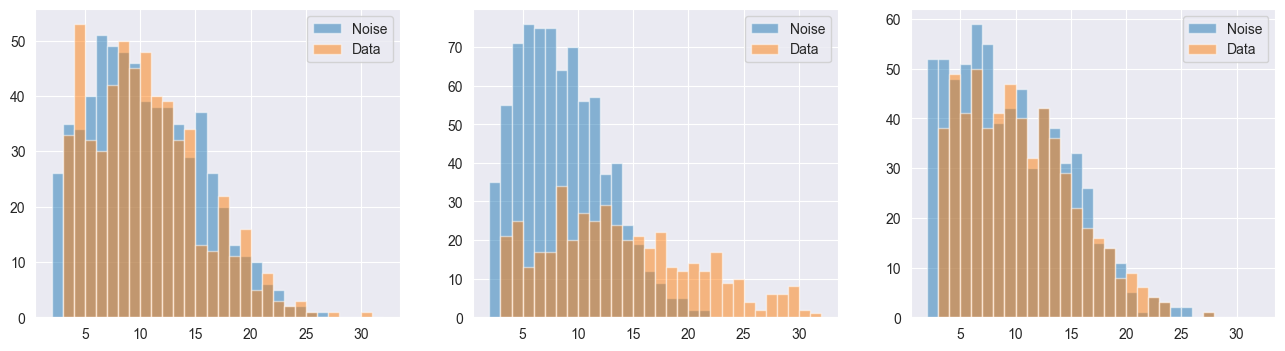

In [16]:
# Plot the histogram of the block sizes for the three sets
fig_blk_size_hist = plt.figure(1, figsize=(16, 4))

# data for set1
fig_blk_size_hist.add_subplot(131)
plt.hist(
    matrix_data_set1.get_list_of_block_sizes("tdata"),
    bins=list(range(set1_blk_tdata_bp.len_min, set1_blk_tdata_bp.len_max + 1)),
    alpha=0.5,
    label='Noise'
)
plt.hist(
    matrix_data_set1.get_list_of_block_sizes("noise"),
    bins=list(range(set1_blk_noise_bp.len_min, set1_blk_noise_bp.len_max + 1)),
    alpha=0.5,
    label='Data'
)
plt.legend(loc='upper right')

# data for set2
fig_blk_size_hist.add_subplot(132)
plt.hist(
    matrix_data_set2.get_list_of_block_sizes("tdata"),
    bins=list(range(set2_blk_tdata_bp.len_min, set2_blk_tdata_bp.len_max + 1)),
    alpha=0.5,
    label='Noise'
)
plt.hist(
    matrix_data_set2.get_list_of_block_sizes("noise"),
    bins=list(range(set2_blk_noise_bp.len_min, set2_blk_noise_bp.len_max + 1)),
    alpha=0.5,
    label='Data'
)
plt.legend(loc='upper right')

# data for set3
fig_blk_size_hist.add_subplot(133)
plt.hist(
    matrix_data_set3.get_list_of_block_sizes("tdata"),
    bins=list(range(set3_blk_tdata_bp.len_min, set3_blk_tdata_bp.len_max + 1)),
    alpha=0.5,
    label='Noise'
)
plt.hist(
    matrix_data_set3.get_list_of_block_sizes("noise"),
    bins=list(range(set3_blk_noise_bp.len_min, set3_blk_noise_bp.len_max + 1)),
    alpha=0.5,
    label='Data'
)
plt.legend(loc='upper right')

plt.show()

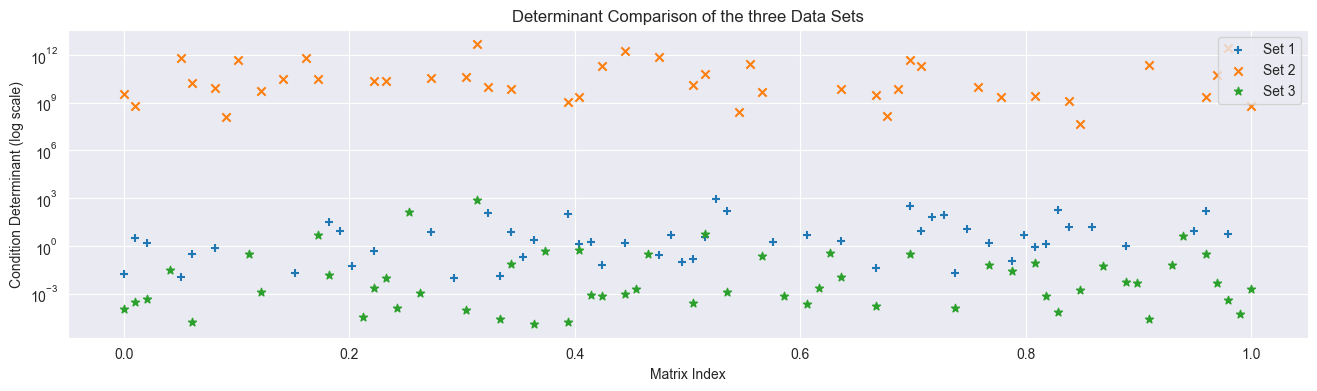

In [23]:
# Plot the histogram of the block sizes for the three sets
fig_det_scatter = plt.figure(2, figsize=(16, 4))
x_vals = np.linspace(0, 1, num=NUMBER_OF_MATRICES)

# data for set1
set1_determinants = [matrix_data_set1.metadata[i].det for i in range(matrix_data_set1.len)]
plt.scatter(x_vals, set1_determinants, label="Set 1", marker='+')

# data for set2
set1_determinants = [matrix_data_set2.metadata[i].det for i in range(matrix_data_set2.len)]
plt.scatter(x_vals, set1_determinants, label="Set 2", marker='x')

# data for set3
set1_determinants = [matrix_data_set3.metadata[i].det for i in range(matrix_data_set3.len)]
plt.scatter(x_vals, set1_determinants, label="Set 3", marker='*')

plt.legend(loc='upper right')
plt.xlabel('Matrix Index')
plt.ylabel('Condition Determinant (log scale)')
plt.gca().set_yscale('log')
plt.title('Determinant Comparison of the three Data Sets')

plt.show()

In [ ]:
# TODO: implement/copy from matrix_data_generation.ipynb

## Data Size-Reduction

[Present the memory footprint reduction by using bands instead of the full matrix.]


In [ ]:
# TODO: implement/copy from matrix_data_generation.ipynb

## Data Statistics

[Investigate the data for their statistical properties (esp. avg values, spread, etc.) and compare those with the parameters provided.]


In [ ]:
# TODO: implement